# MULTIPLE LINEAR REGRESSION

# Assignment Task:
* Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
* Dataset consists of following varibales (Age, KM, FuelType, HP, Automatic, CC, Doors, Weight, Quarterly_Tax, Price)
# Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.

Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.


In [12]:
# Importing Libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import missingno as mn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import influence_plot

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Dataset

raw_data=pd.read_csv('E:\Assignment\MLR\ToyotaCorolla.csv',encoding='latin1')
raw_data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
print('Number of Rows & Columns{}'.format(raw_data.shape))

Number of Rows & Columns(1436, 11)


In [5]:
# Descriptive Analysis
raw_data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
# Checking for Data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


# Observation: all the data types are correct.

In [7]:
# Renaming the columns name
data=raw_data.rename({'Age_08_04':'Age','cc':'CC','Fuel_Type':'FT'},axis=1)
data.head()

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [8]:
# Checking for missing values
data[data.values==0.0]

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [9]:
data.isnull().sum()

Price        0
Age          0
KM           0
FT           0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

<Axes: >

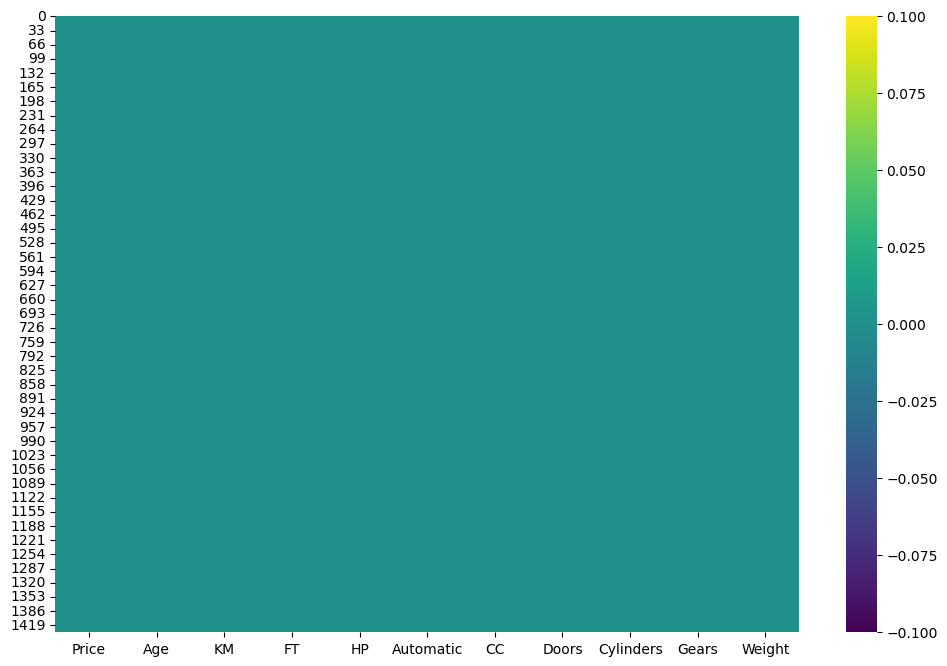

In [10]:
# Visualizing Missing Values
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')

<Axes: >

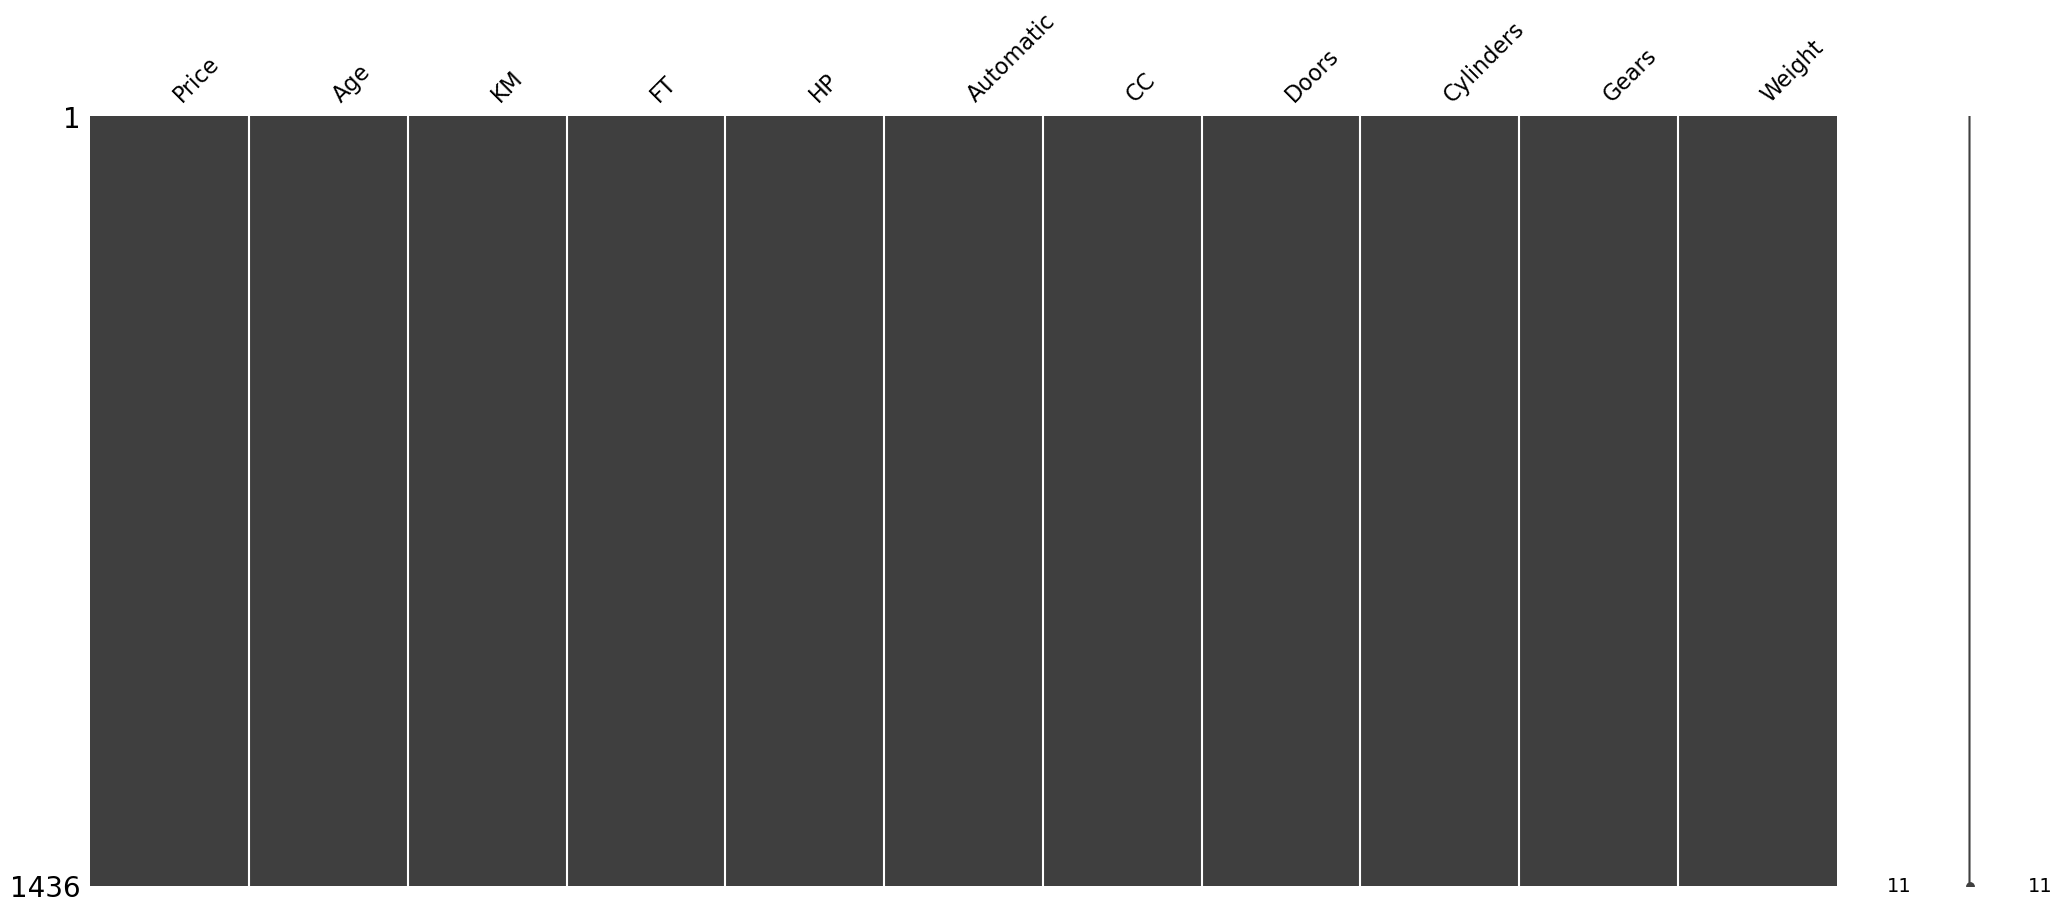

In [13]:
mn.matrix(data)

# Observation: After checking above there is no null value present in the dataset

In [14]:
#Checking for Duplicated Values
data[data.duplicated()]

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [15]:
data[data.duplicated()].shape

(1, 11)

In [16]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight


# Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables


In [17]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 7


In [18]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


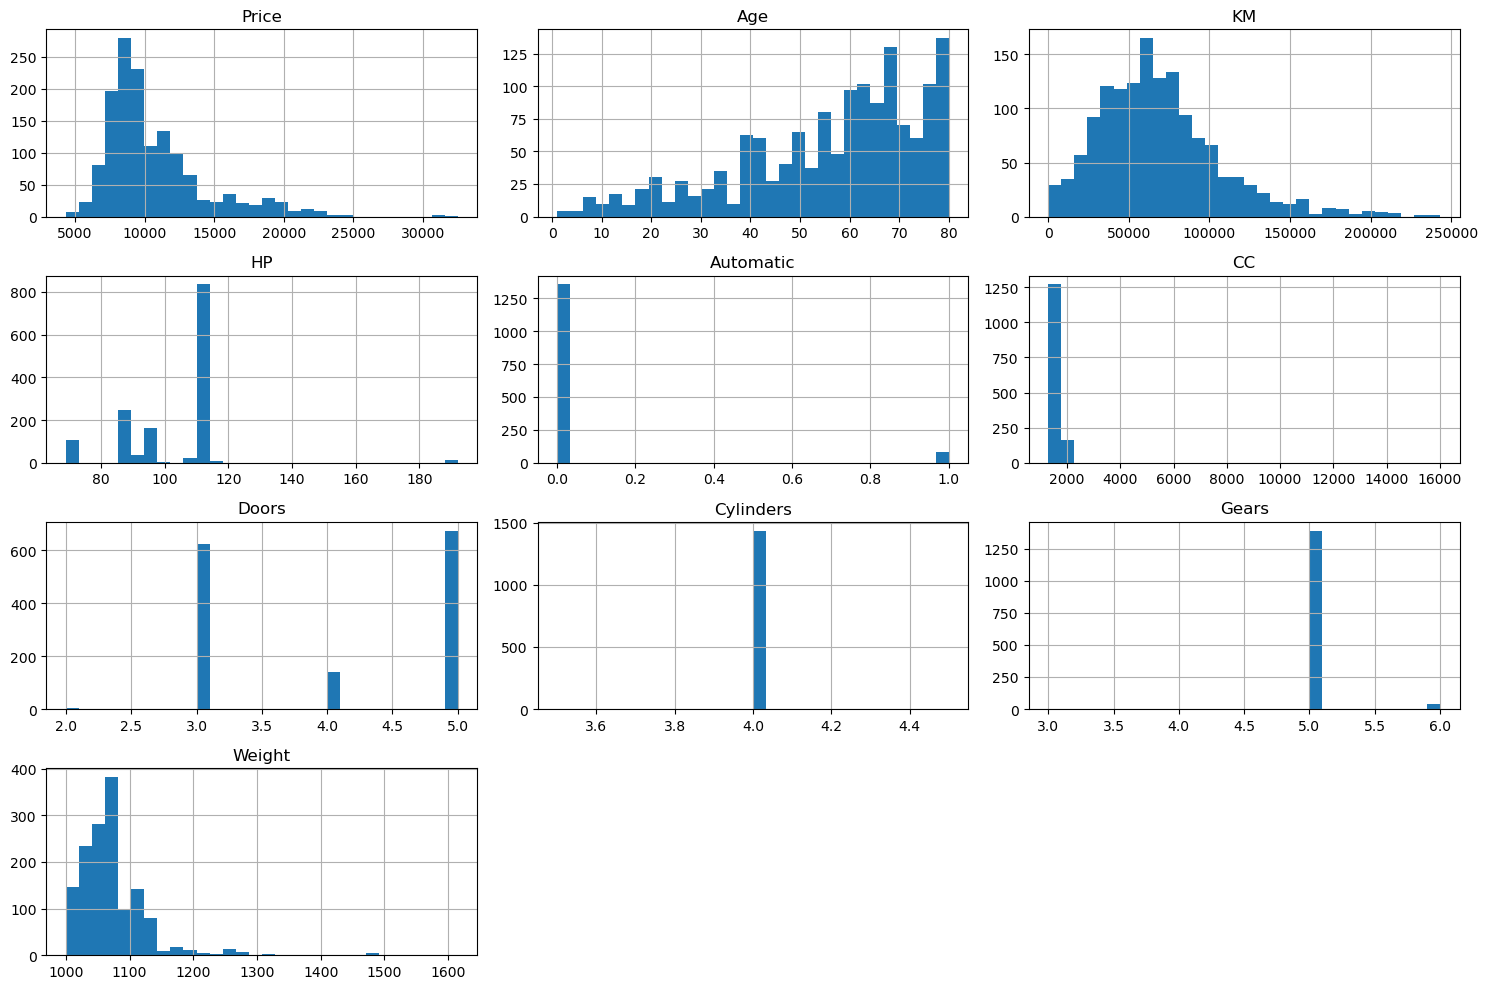

In [23]:
# Visualize the distribution of each numerical variable
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

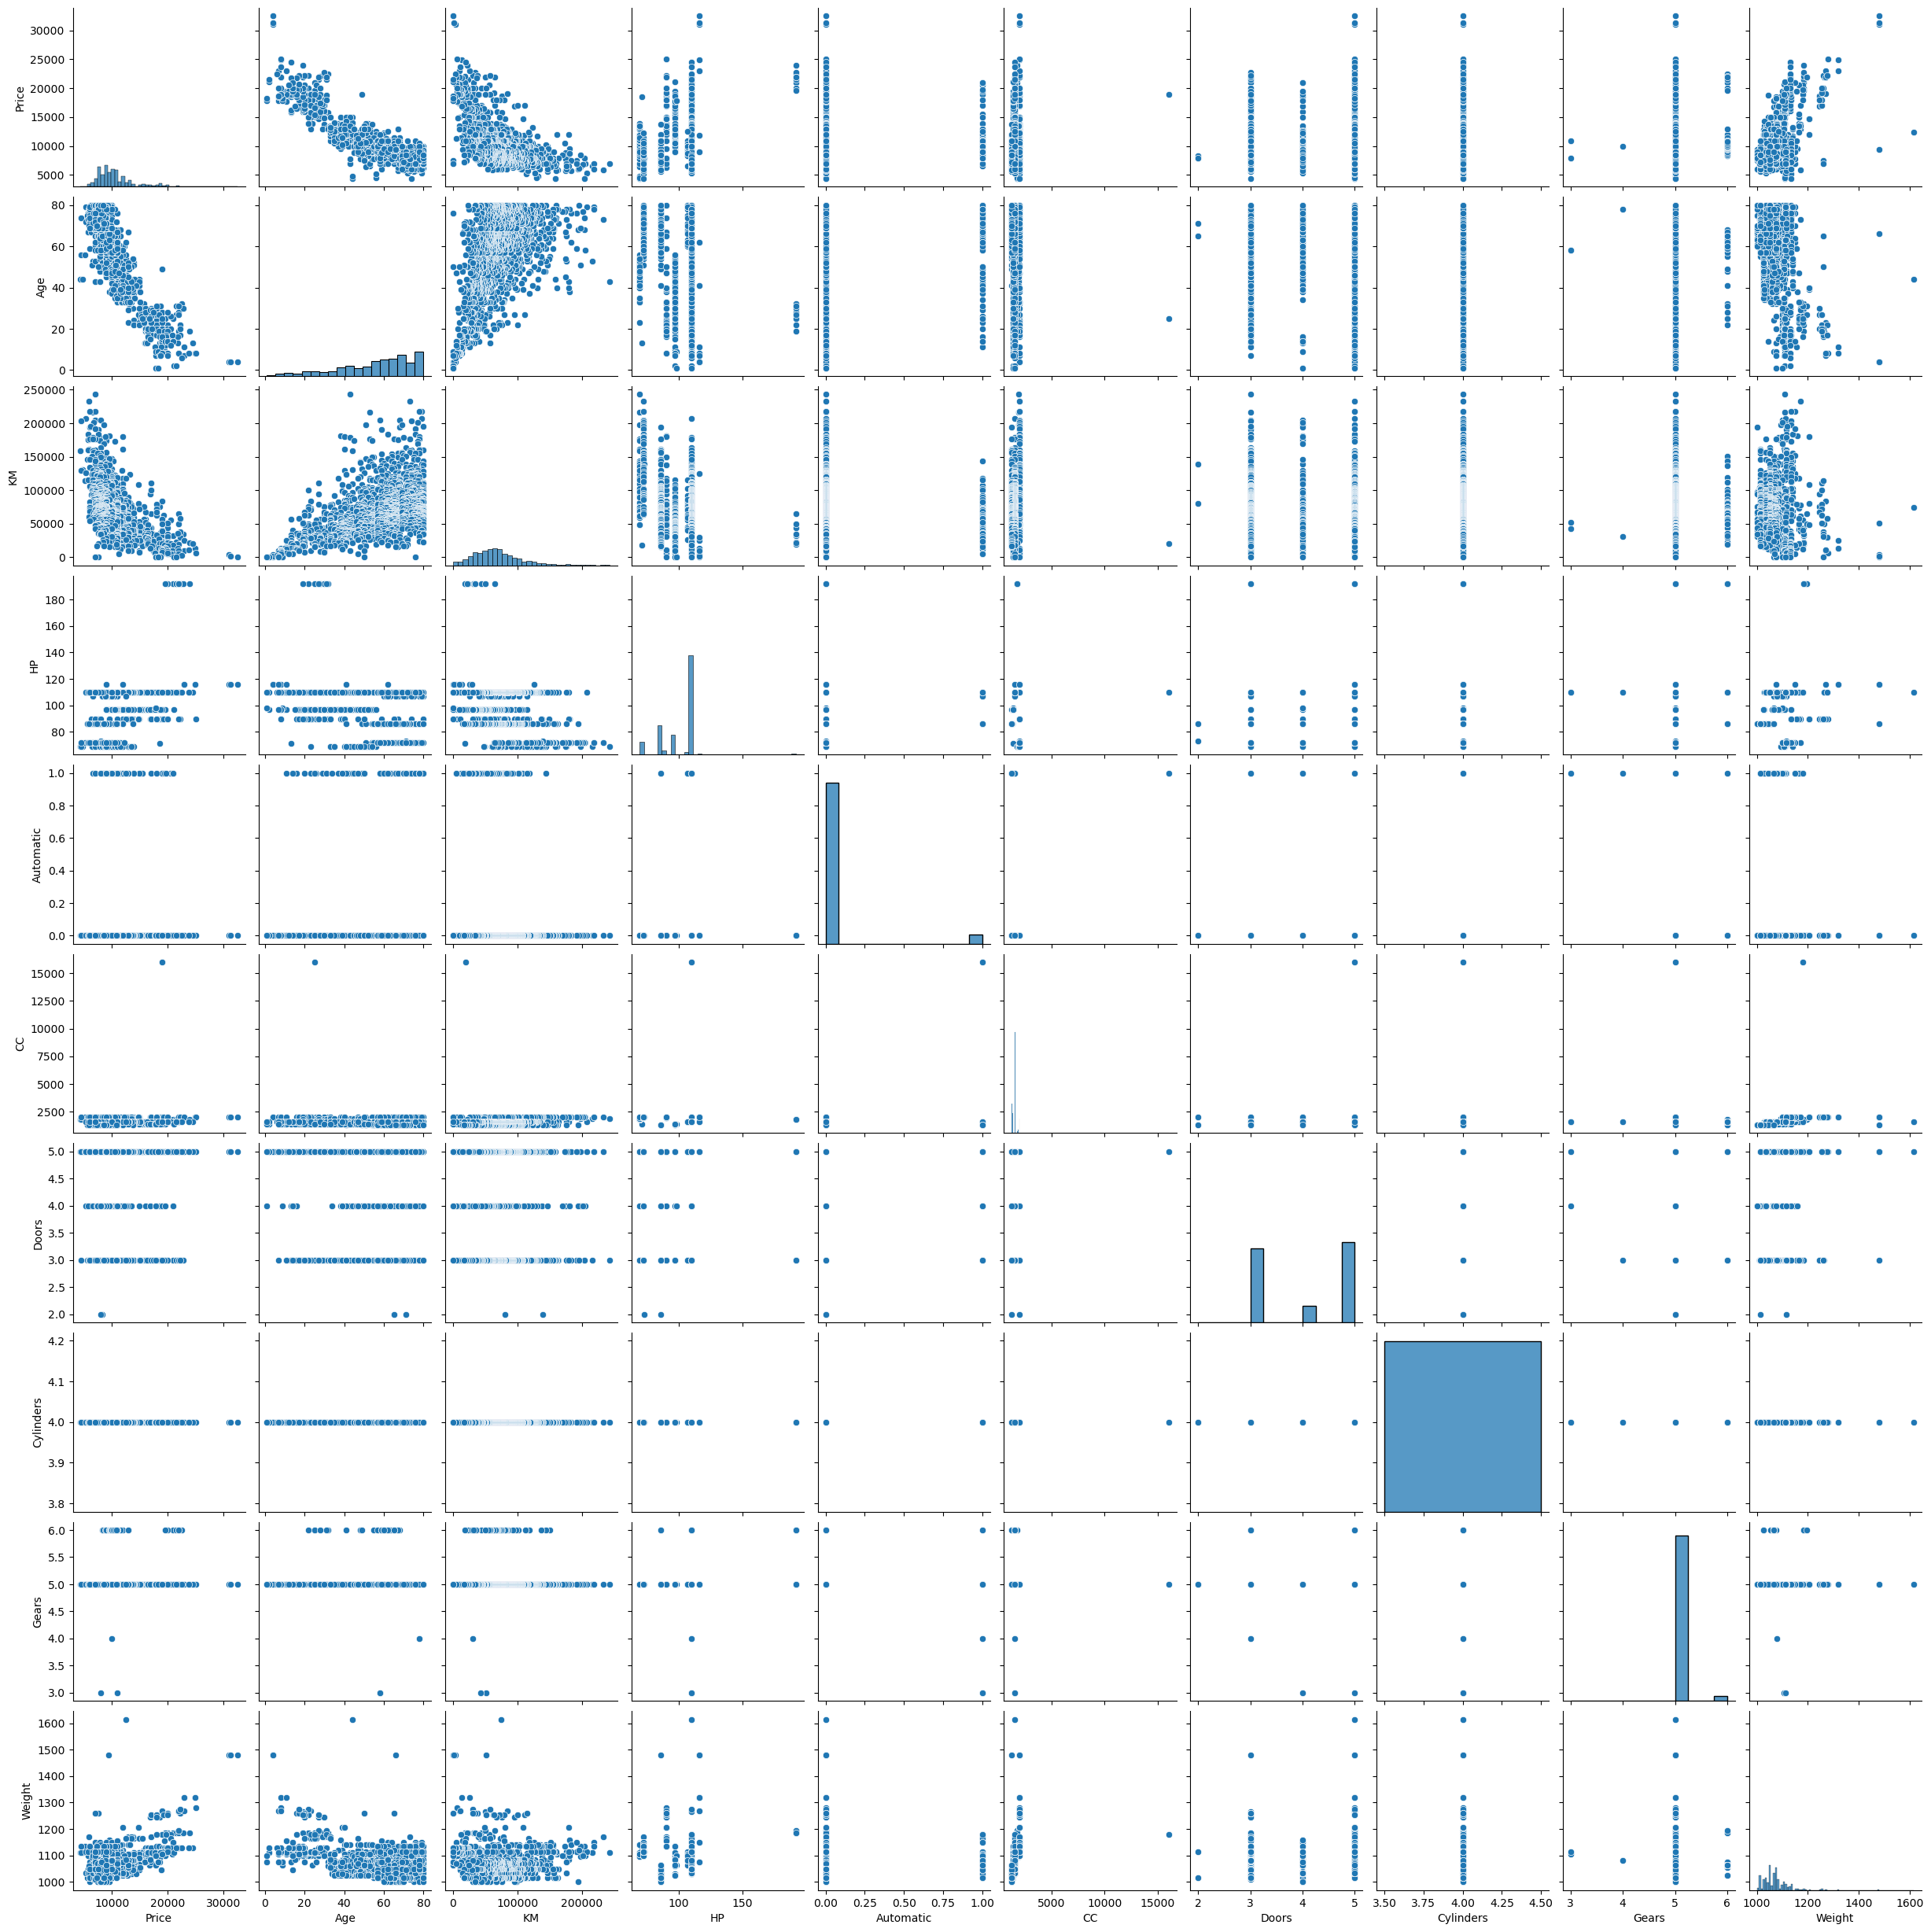

In [19]:
# Visualize relationships using pairplot
sns.pairplot(data)
plt.show()

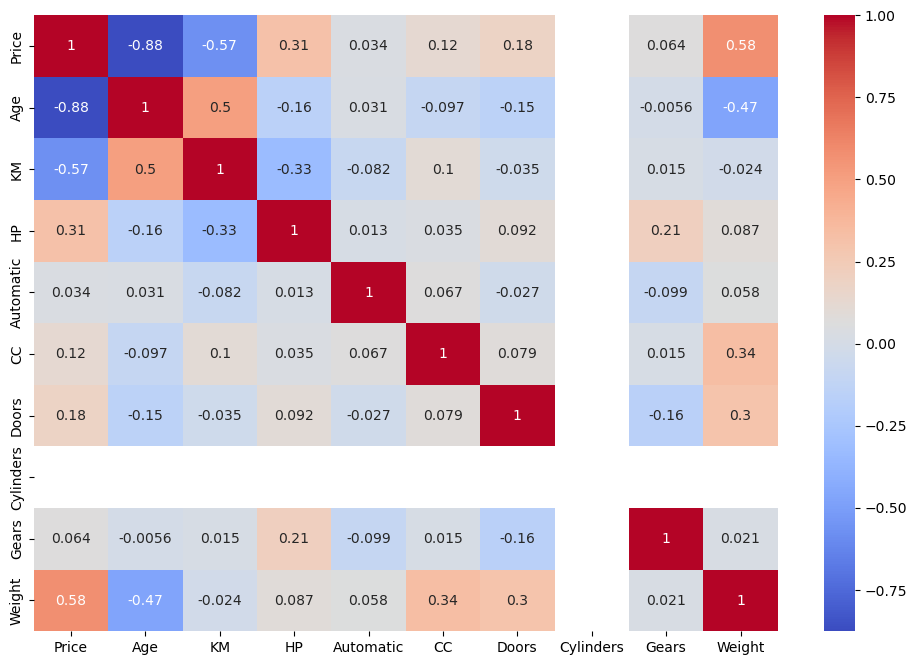

In [25]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
# Encode categorical variables
df = pd.get_dummies(data, drop_first=True)
df

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FT_Diesel,FT_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1431,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1432,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1433,7250,70,16916,86,0,1300,3,4,5,1015,0,1


# Model Bulding

In [21]:
model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit()

# Model Testing

In [23]:
# Finding Coefficient parameters
model.params

Intercept    -573.776185
Age          -123.840430
KM             -0.017416
HP             23.314614
Automatic     303.253603
CC             -0.052021
Doors         -29.884035
Cylinders   -2295.104741
Gears         627.081986
Weight         20.706603
FT_Diesel     536.998924
FT_Petrol    1144.718527
dtype: float64

In [24]:
# Finding Tvalues and Pvalues
model.tvalues, np.round(model.pvalues,5)

(Intercept    -6.378173
 Age         -47.101539
 KM          -13.071595
 HP            6.523899
 Automatic     1.884709
 CC           -0.565422
 Doors        -0.731102
 Cylinders    -6.378173
 Gears         3.169053
 Weight       16.991624
 FT_Diesel     1.403842
 FT_Petrol     3.383024
 dtype: float64,
 Intercept    0.00000
 Age          0.00000
 KM           0.00000
 HP           0.00000
 Automatic    0.05967
 CC           0.57188
 Doors        0.46484
 Cylinders    0.00000
 Gears        0.00156
 Weight       0.00000
 FT_Diesel    0.16058
 FT_Petrol    0.00074
 dtype: float64)

In [25]:
# Finding rsquared values
model.rsquared, model.rsquared_adj    # model accucracy is 86.28%

(0.8637648551448405, 0.862808147666925)

# We need to build SLR and MLR for insignificant variables 'CC' and 'Doors'
# Also find their t values and pvalues

In [29]:
slr_cc=smf.ols('Price~CC',data=df).fit()
slr_cc.tvalues, slr_cc.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [30]:
slr_d=smf.ols('Price~Doors',data=df).fit()
slr_d.tvalues, slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [31]:
mlr_cd=smf.ols('Price~CC+Doors',data=df).fit()
mlr_cd.tvalues, mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques

In [33]:
# 1) Check collinearity 
rsq_age=smf.ols('Age~KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_Automatic=smf.ols('Automatic~Age+KM+HP+CC+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_Automatic=1/(1-rsq_Automatic)

rsq_cc=smf.ols('CC~Age+KM+HP+Automatic+Doors+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_DR=smf.ols('Doors~Age+KM+HP+Automatic+CC+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_CY=smf.ols('Cylinders~Age+KM+HP+Automatic+CC+Doors+Gears+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_CY=1/(1-rsq_CY)

rsq_GR=smf.ols('Gears~Age+KM+HP+Automatic+CC+Doors+Cylinders+Weight+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_WT=smf.ols('Weight~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+FT_Diesel+FT_Petrol',data=df).fit().rsquared
vif_WT=1/(1-rsq_WT)

rsq_FT_D=smf.ols('FT_Diesel~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Petrol',data=df).fit().rsquared
vif_FT_D=1/(1-rsq_FT_D)

rsq_FT_P=smf.ols('FT_Petrol~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Diesel',data=df).fit().rsquared
vif_FT_P=1/(1-rsq_FT_P)


# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','Automatic','CC','Doors','Cylinders','Gears','Weight','FT_Petrol','FT_Diesel'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_Automatic,vif_cc,vif_DR,vif_CY,vif_GR,vif_WT,vif_FT_P,vif_FT_D]}
Vif_df=pd.DataFrame(d1)
Vif_df

print('None of the VIF>20, no collinarity so consider all variables in Regression equation')


None of the VIF>20, no collinarity so consider all variables in Regression equation


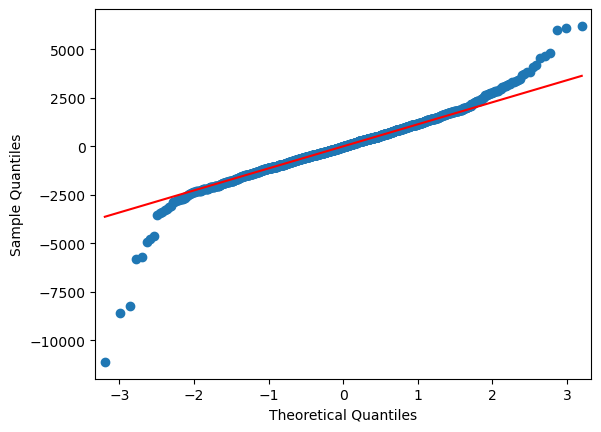

In [34]:
# 2) check Residual 
sm.qqplot(model.resid,line='q')
plt.show()

In [35]:
list(np.where(model.resid>6000)) # outlier detection from above QQ plot

[array([146, 522], dtype=int64)]

In [36]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [37]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) :
    return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

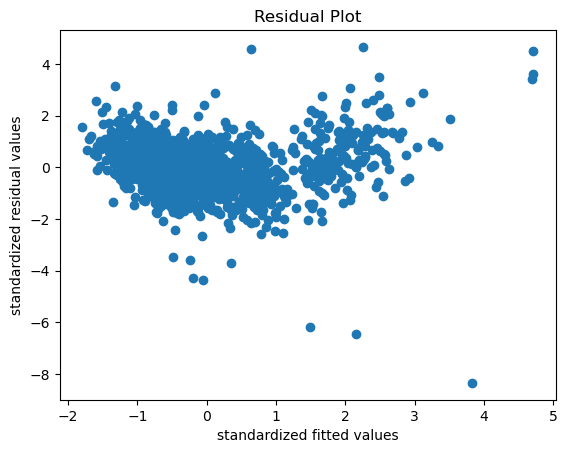

In [38]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

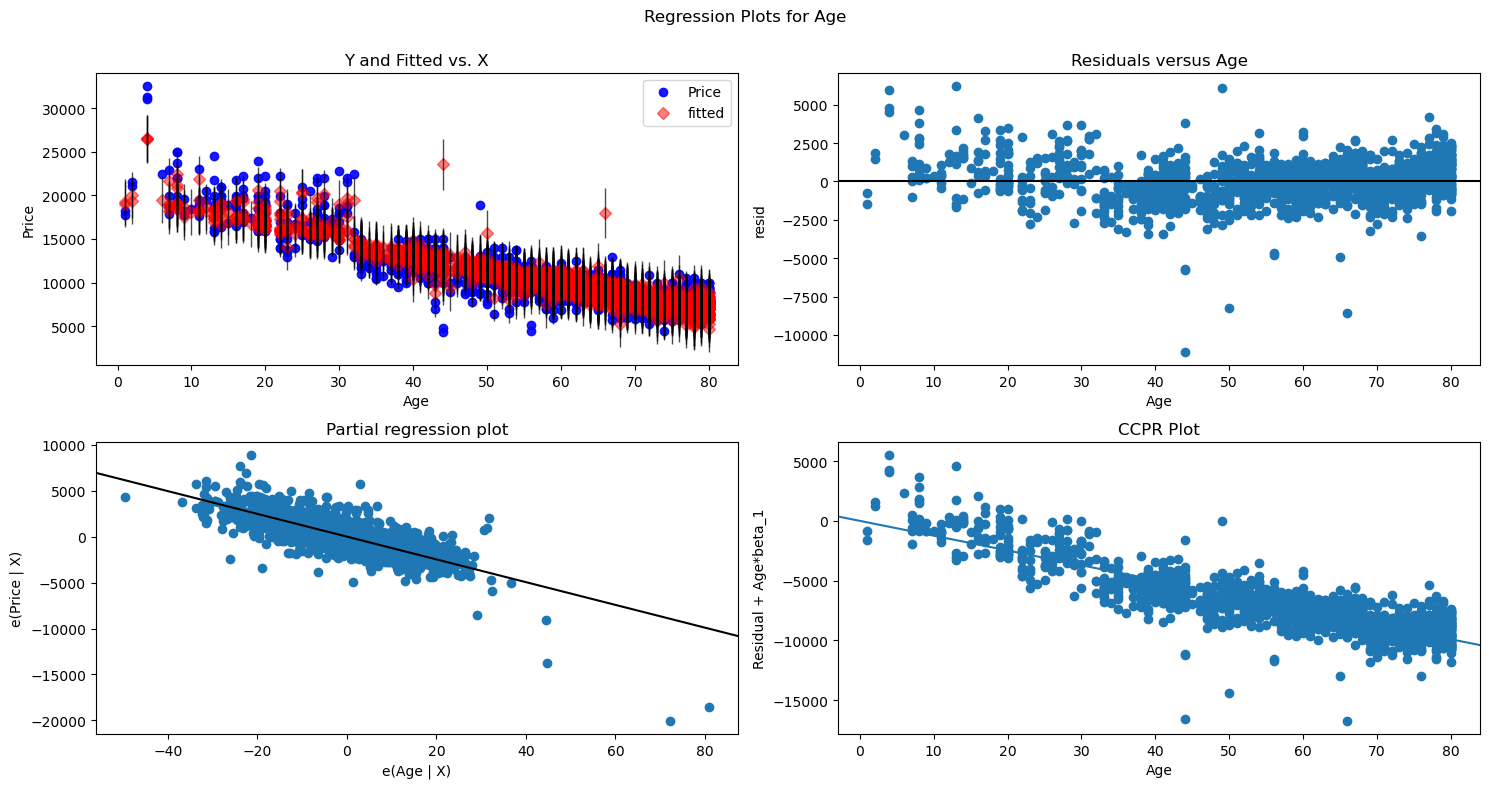

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

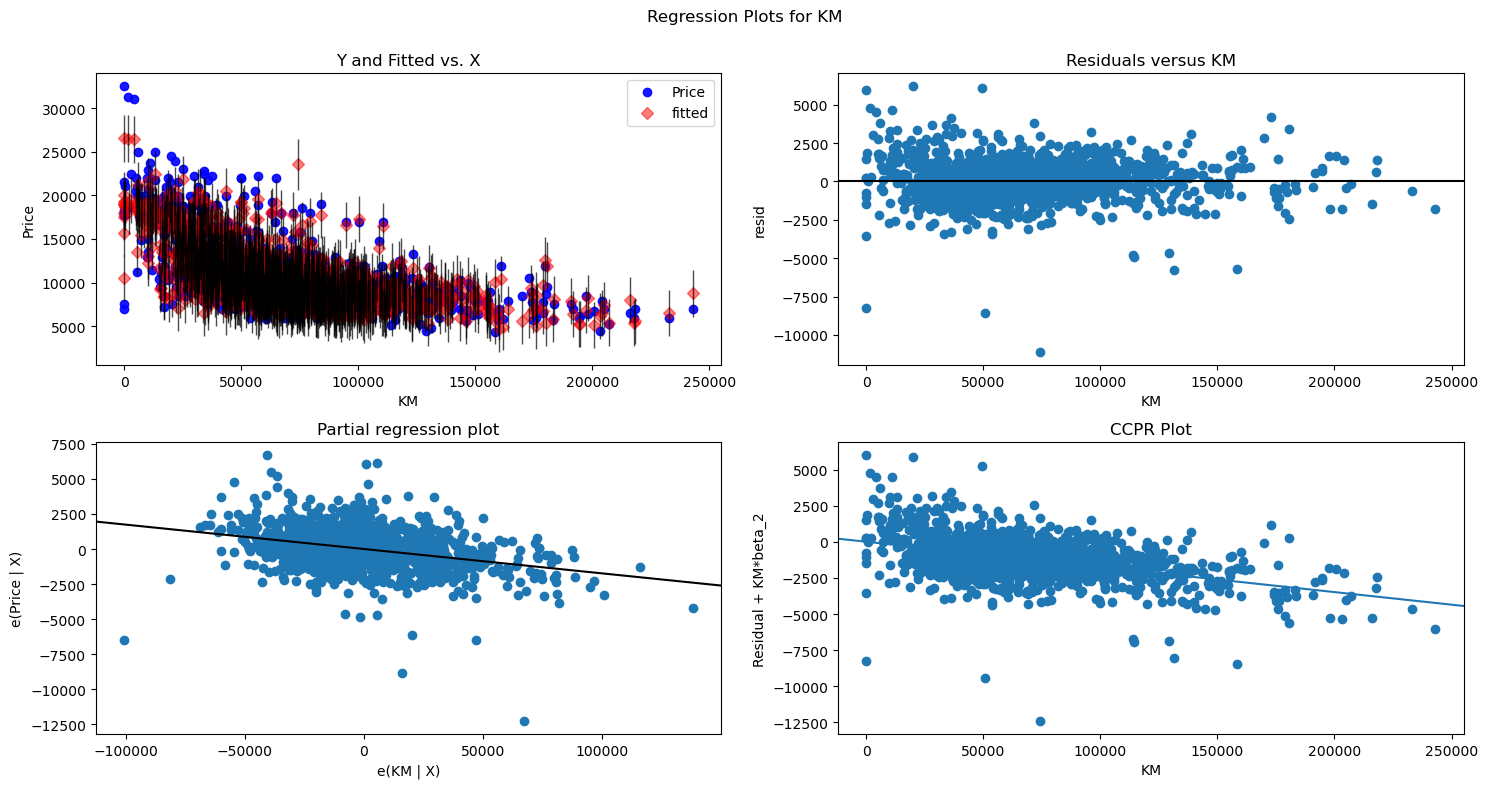

In [40]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

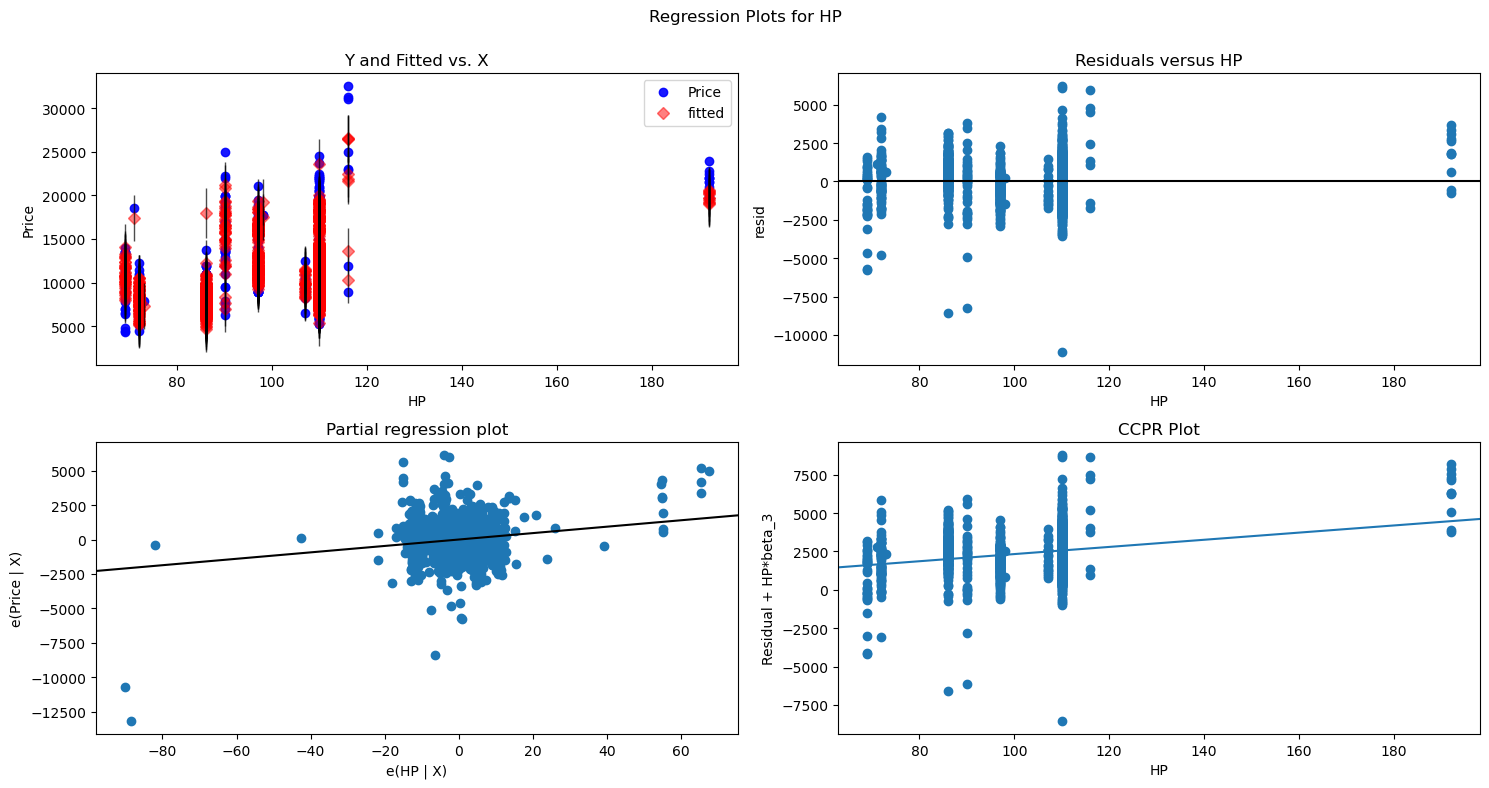

In [41]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()


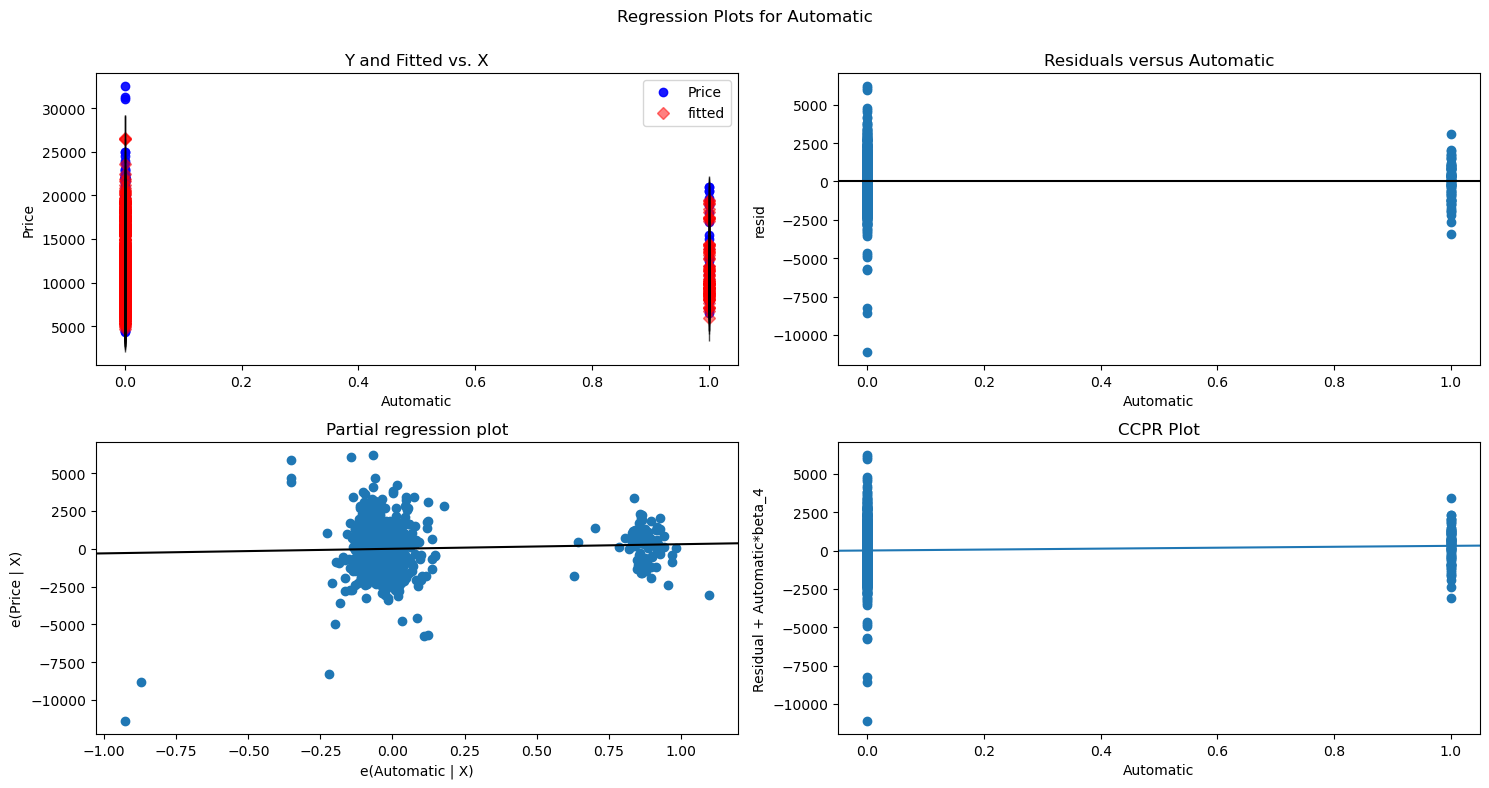

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Automatic',fig=fig)
plt.show()


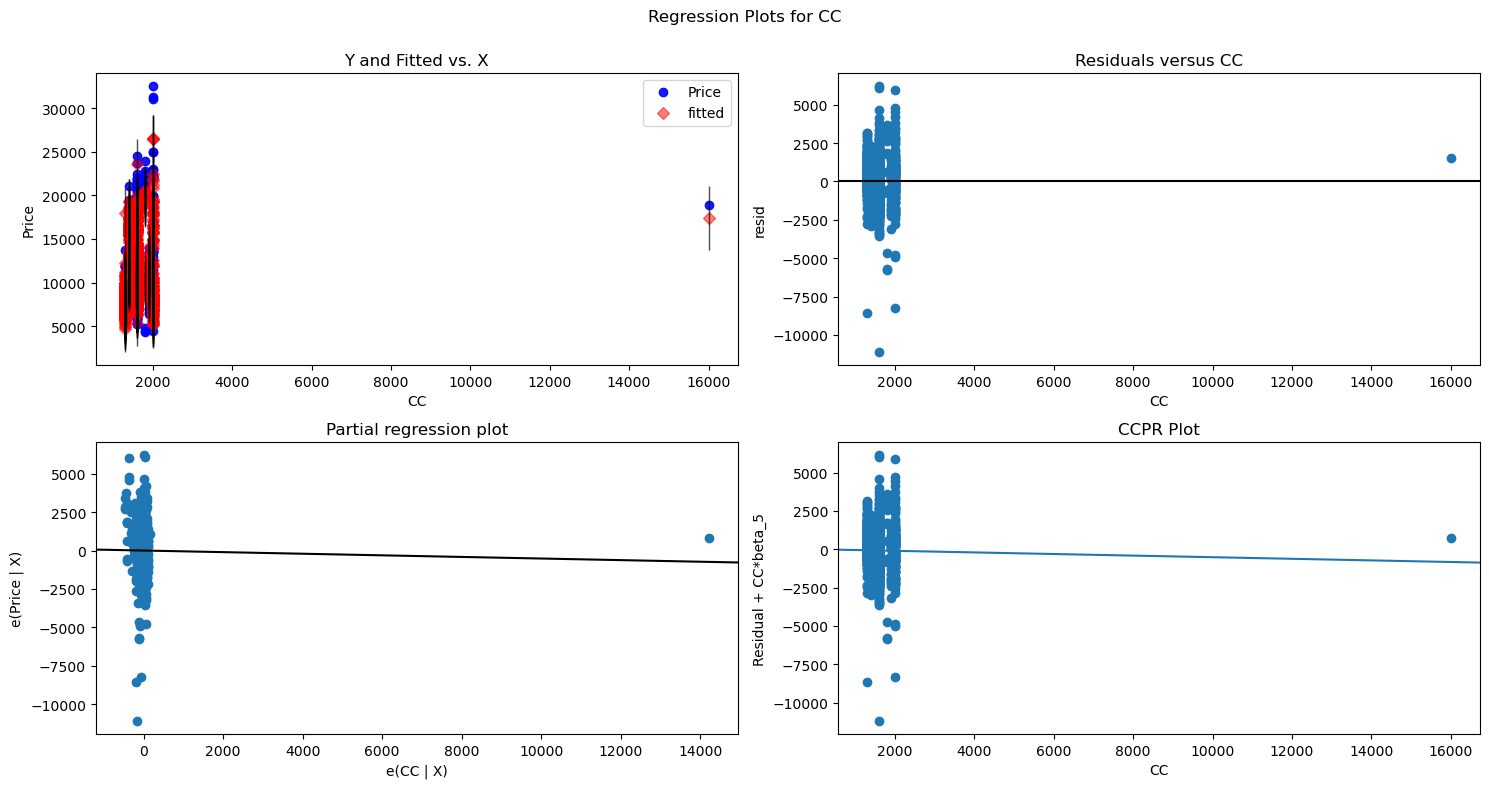

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

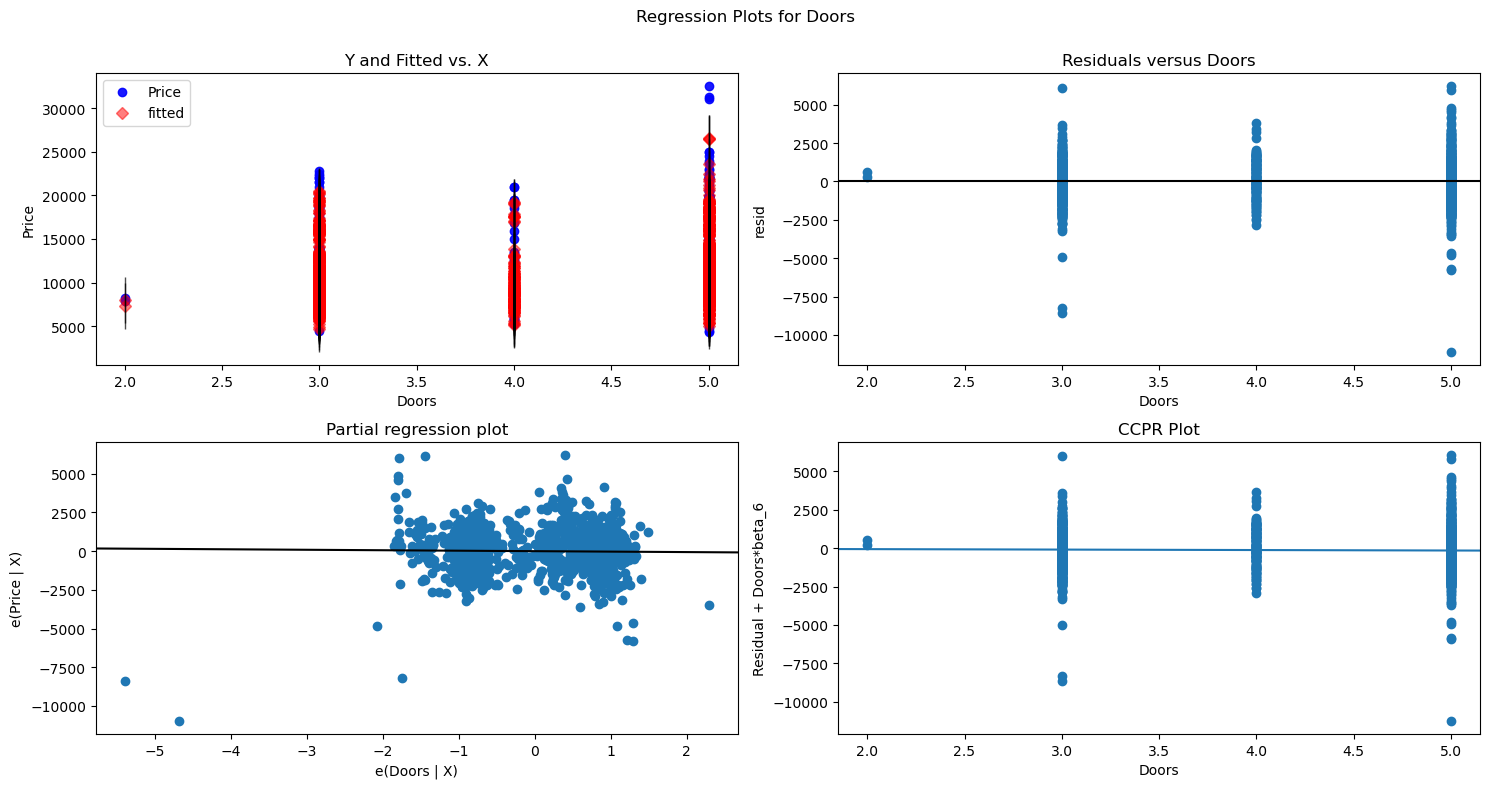

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

ValueError: specify slope and intercepty or model_results

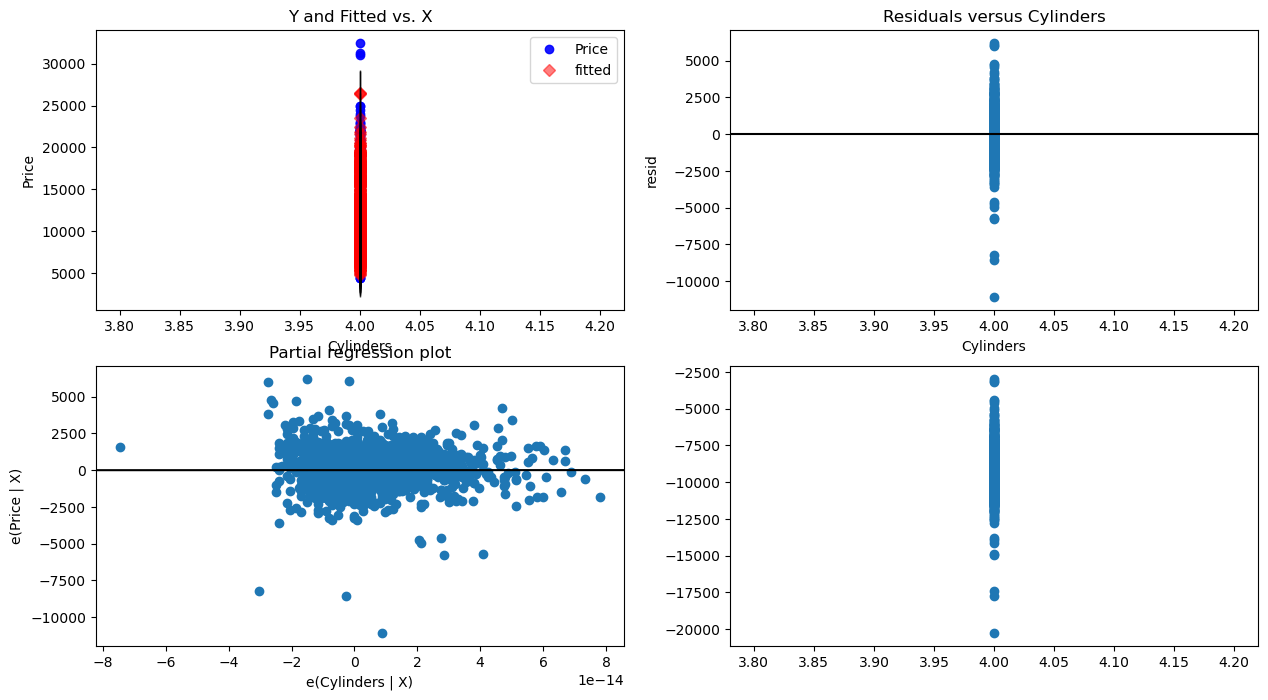

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Cylinders',fig=fig)
plt.show()

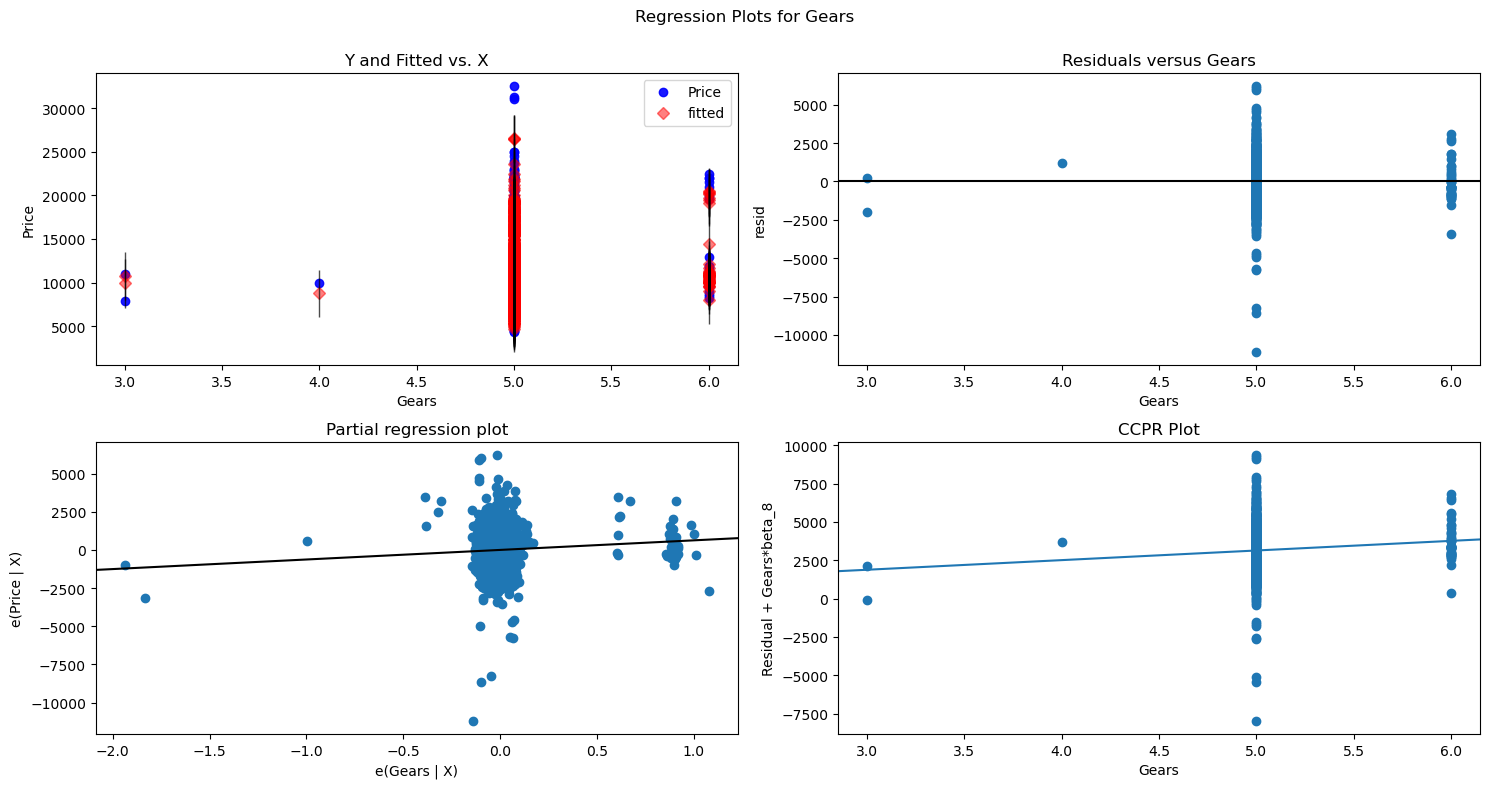

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()


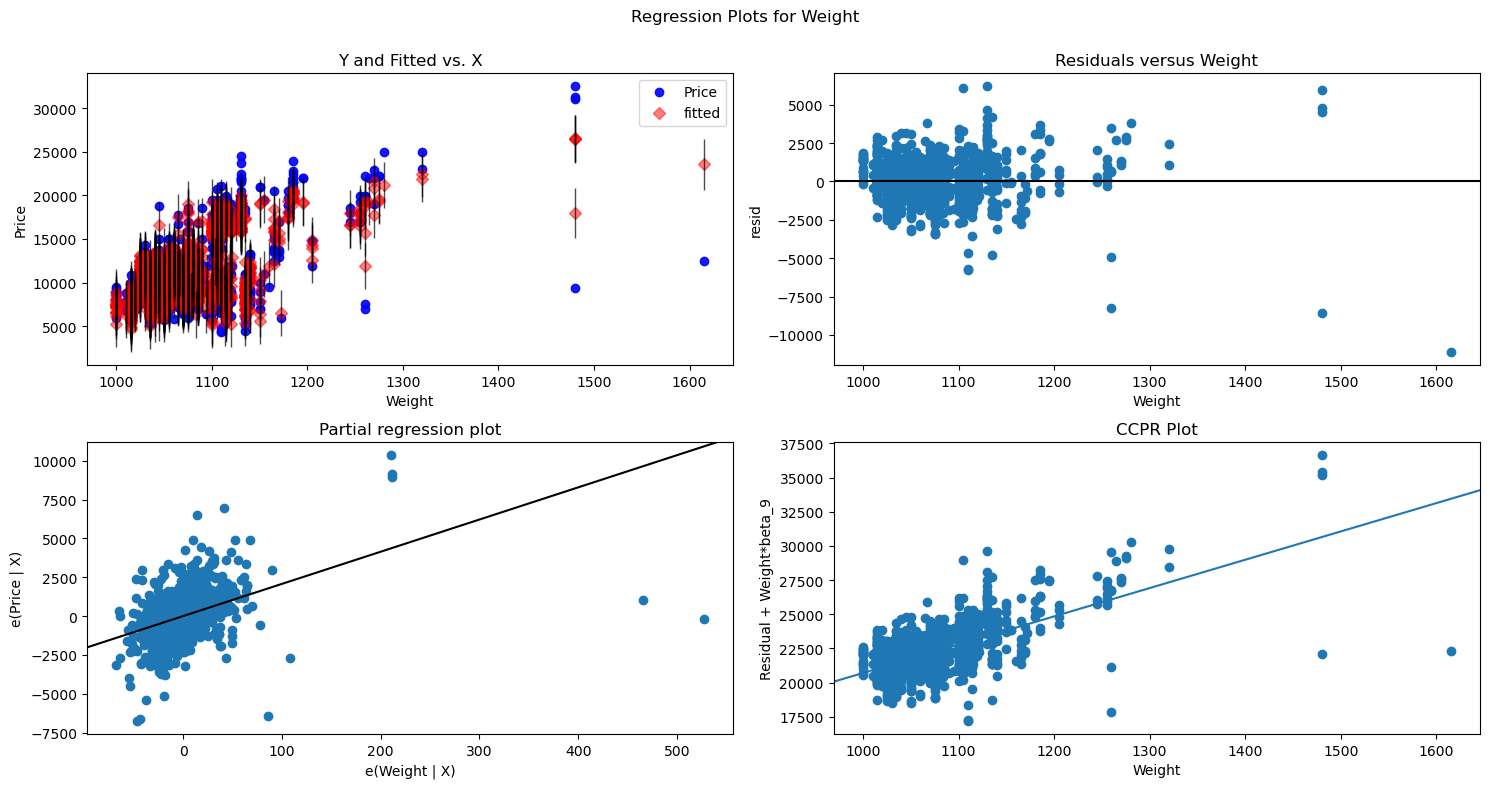

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

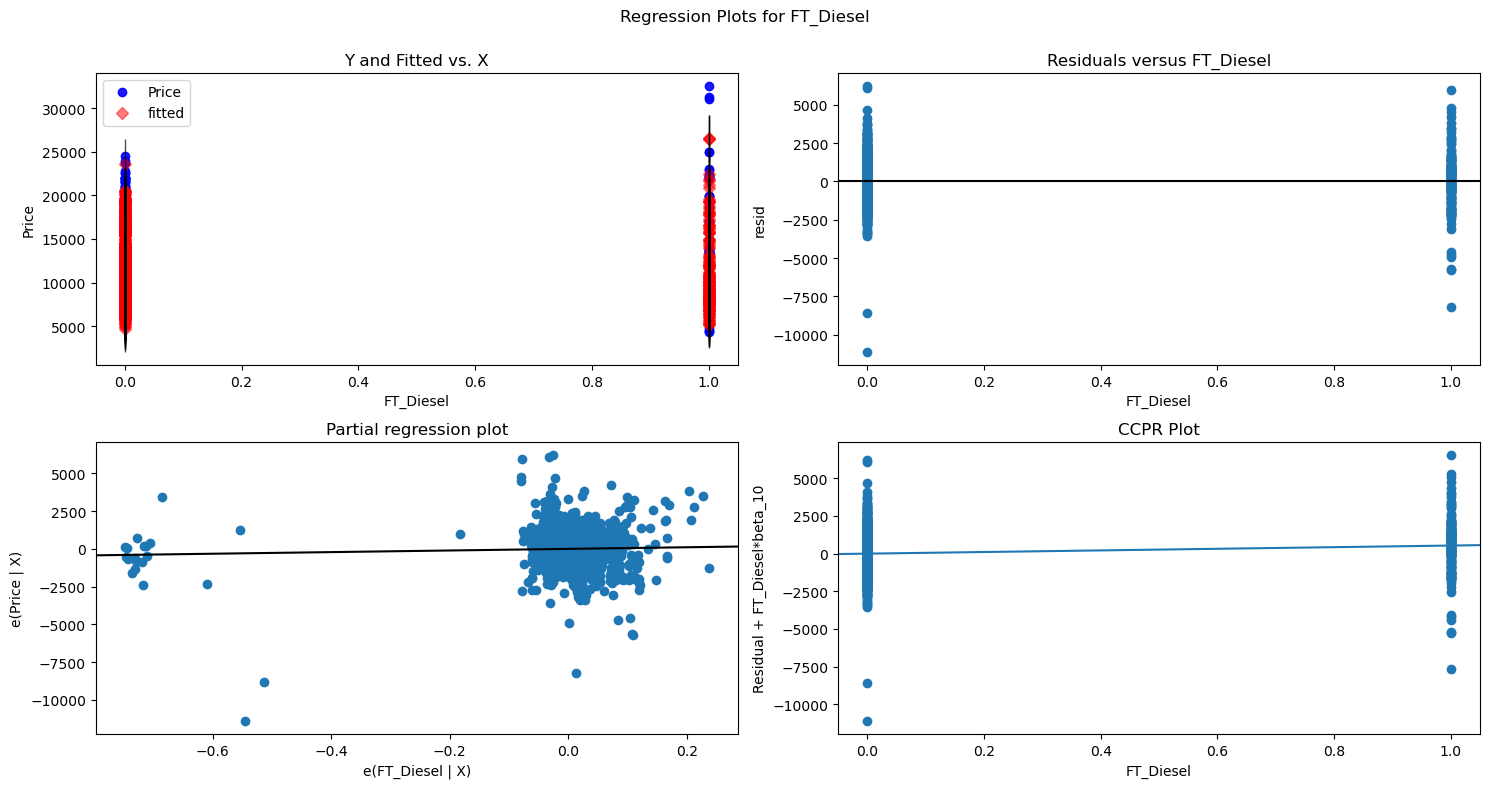

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'FT_Diesel',fig=fig)
plt.show()

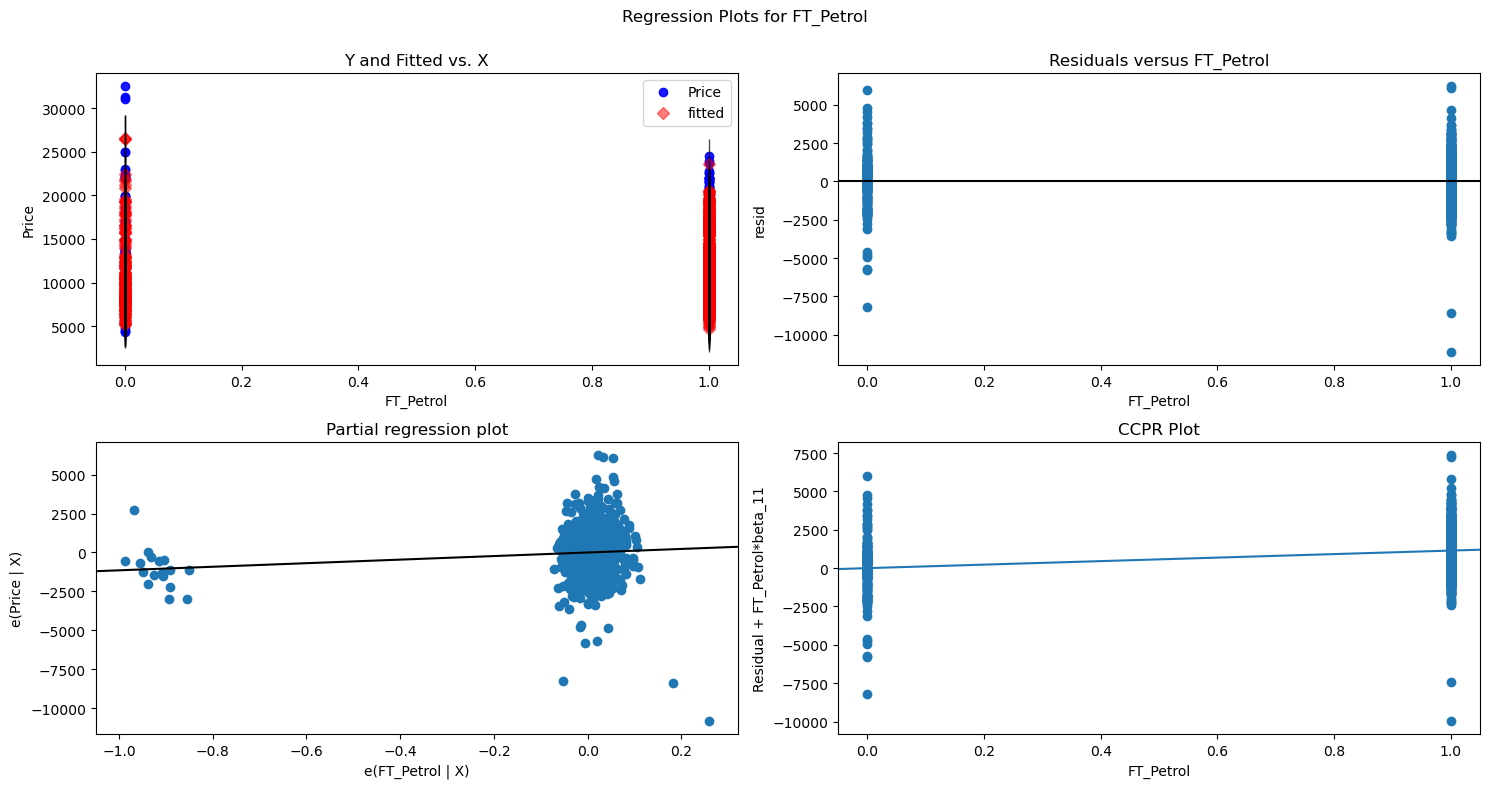

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'FT_Petrol',fig=fig)
plt.show()

In [52]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([4.20329555e-03, 2.12736364e-03, 2.95311457e-03, ...,
       1.24558008e-05, 4.30330817e-04, 7.04076283e-03])

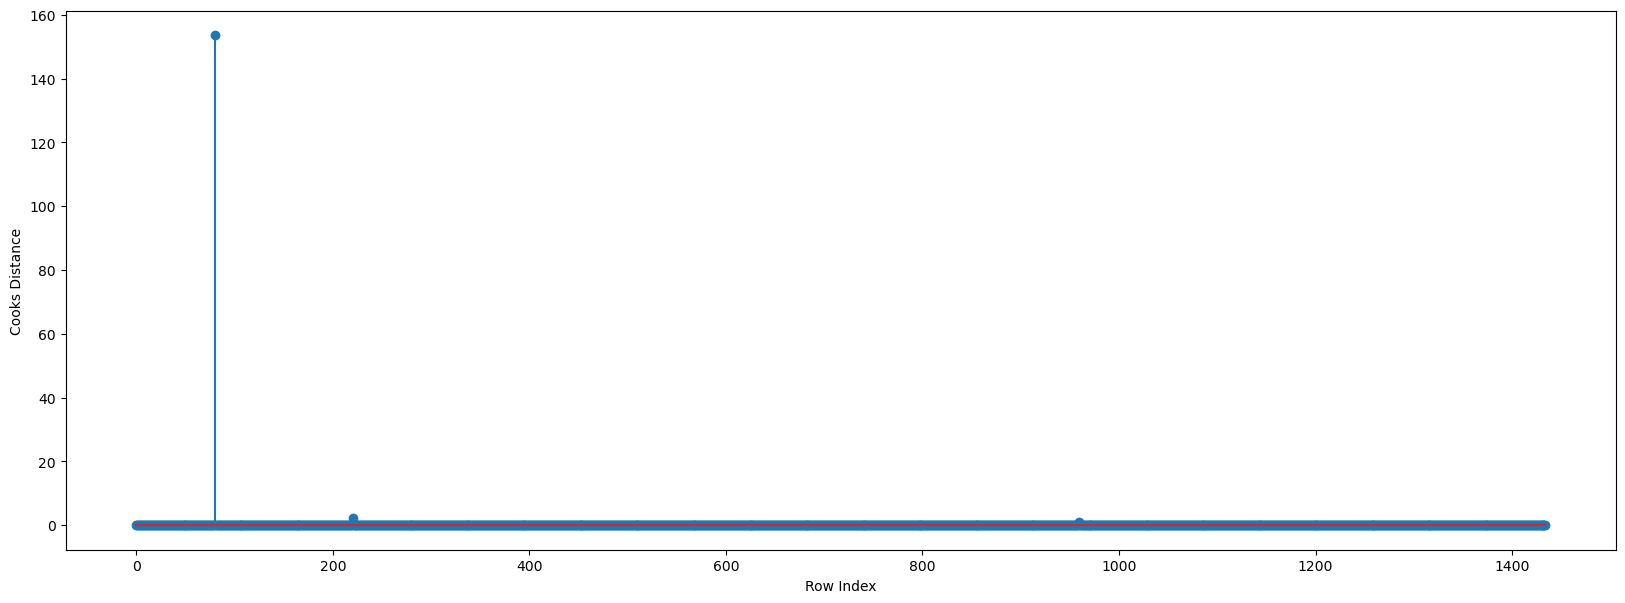

In [54]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 153.58892624721406)

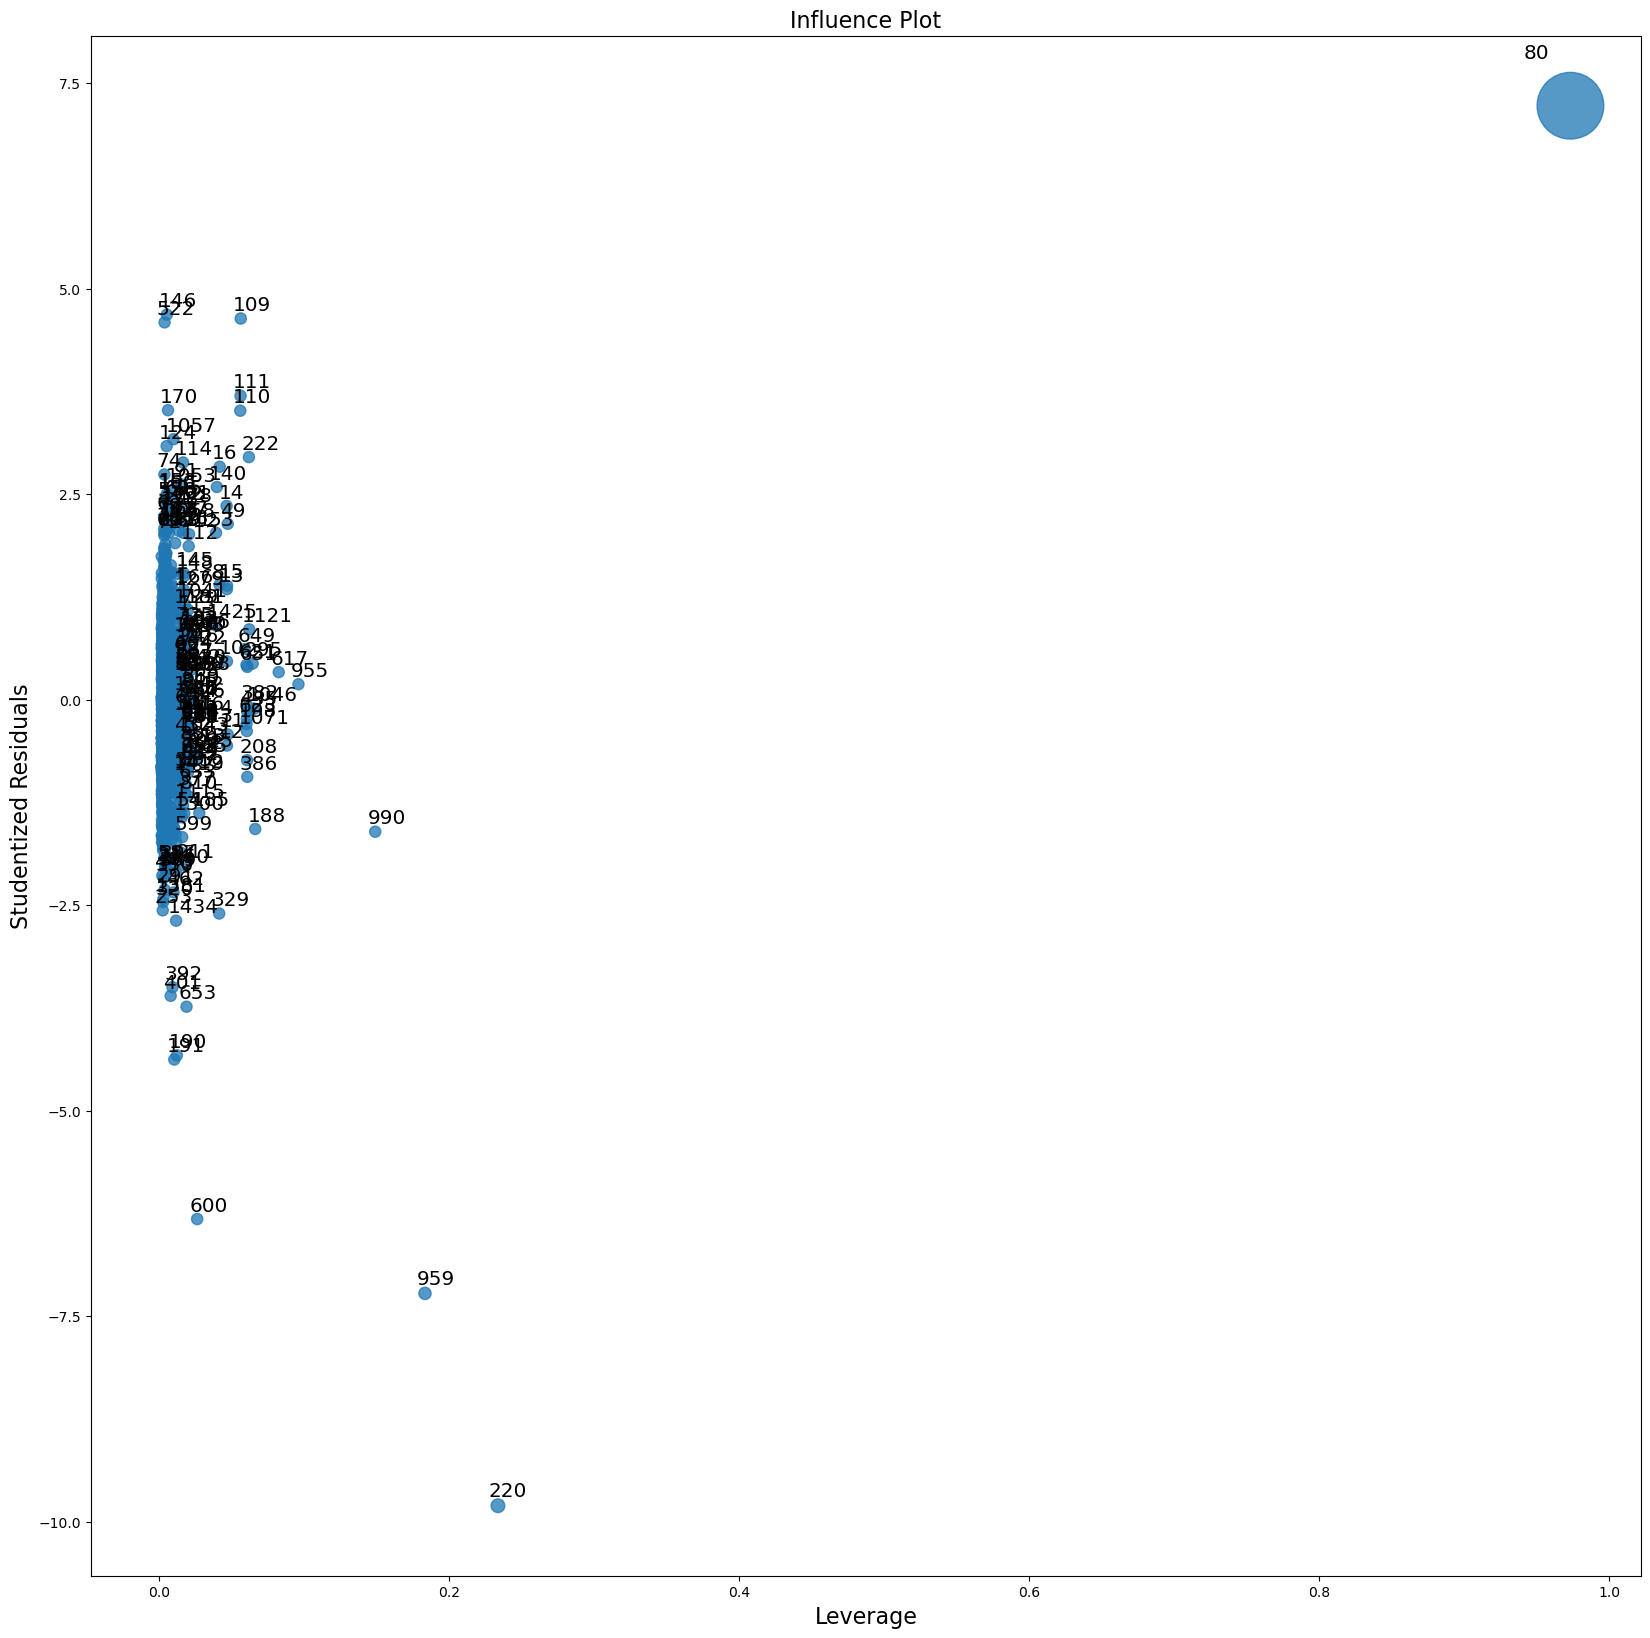

In [56]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [57]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.027177700348432057

# Improving the Model

In [58]:
# Creating a copy of data so that original dataset is not affected
toyo_new=df.copy()
toyo_new

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FT_Diesel,FT_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1431,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1432,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1433,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [60]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo2=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo2

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FT_Diesel,FT_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1430,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1431,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1432,7250,70,16916,86,0,1300,3,4,5,1015,0,1


# Final Model without outliers

In [61]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=toyo2).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyo2=toyo2.drop(toyo2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyo2
    else:
        final_model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Cylinders+Gears+Weight+FT_Diesel+FT_Petrol',data=toyo2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8758982578276345
Thus model accuracy is improved to 0.8847649274166013
Thus model accuracy is improved to 0.8896173987082907
Thus model accuracy is improved to 0.8906404501756842
Thus model accuracy is improved to 0.8931044432559762
Thus model accuracy is improved to 0.8932964954490081
Thus model accuracy is improved to 0.892667387285717
Thus model accuracy is improved to 0.8922112283105681
Thus model accuracy is improved to 0.891737437750162
Thus model accuracy is improved to 0.8913625604378415
Thus model accuracy is improved to 0.8909426689969628
Thus model accuracy is improved to 0.8903914750785082
Thus model accuracy is improved to 0.8899377406788334
Thus model accuracy is improved to 0.8894934554549921
Thus model accuracy is improved to 0.8867207277653898
Thus model accuracy is improved to 0.8862052310397712
Thus model accuracy is improved to 0.8875969423271074
Thus model accuracy is improved to 0.889108736739898
Thus model accuracy is improved

Thus model accuracy is improved to 0.89216498171068
Thus model accuracy is improved to 0.8916971812921236
Thus model accuracy is improved to 0.8922600626783034
Thus model accuracy is improved to 0.8928136385047306
Thus model accuracy is improved to 0.8930053312734441
Thus model accuracy is improved to 0.8932094085662116
Thus model accuracy is improved to 0.8934109244949606
Thus model accuracy is improved to 0.8937533246040726
Thus model accuracy is improved to 0.8939855352942736
Thus model accuracy is improved to 0.8943586791333272
Thus model accuracy is improved to 0.8944990893331807
Thus model accuracy is improved to 0.8945223703662082
Thus model accuracy is improved to 0.894695845392316
Thus model accuracy is improved to 0.8947625413627586
Thus model accuracy is improved to 0.8949687567839135
Thus model accuracy is improved to 0.8954159903193868
Thus model accuracy is improved to 0.8960876017337798
Thus model accuracy is improved to 0.8962470638583675
Thus model accuracy is improved

In [62]:
final_model.rsquared

0.9005682586606464

In [63]:
toyo2

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FT_Diesel,FT_Petrol
0,12950,23,71138,69,0,1900,3,4,5,1105,1,0
1,17950,24,21716,110,0,1600,3,4,5,1105,0,1
2,16750,24,25563,110,0,1600,3,4,5,1065,0,1
3,16950,30,64359,110,0,1600,3,4,5,1105,0,1
4,15950,30,67660,110,0,1600,3,4,5,1105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1244,8950,78,24000,86,1,1300,5,4,5,1065,0,1
1245,8450,80,23000,86,0,1300,3,4,5,1015,0,1
1246,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1247,8500,71,17016,86,0,1300,3,4,5,1015,0,1


# Model prediction

In [74]:
# New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"Automatic":0,"CC":1300,"Doors":4,"Gears":5,"Cylinders":4,"Weight":1012,"FT_Diesel":1,"FT_Petrol":0},index=[0])
new_data

,Age,KM,HP,Automatic,CC,Doors,Gears,Cylinders,Weight,FT_Diesel,FT_Petrol
0,12,40000,80,0,1300,4,5,4,1012,1,0


In [75]:
# Manual Prediction of Price
final_model.predict(new_data)

0   -1685.960766
dtype: float64

In [76]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo2)
pred_y

0       12779.325355
1       16614.326871
2       15140.124355
3       15299.920476
4       15250.900203
            ...     
1244     9080.031879
1245     7732.342123
1246     9371.861919
1247     8842.933860
1248     8957.944269
Length: 1249, dtype: float64